In [1]:
import gensim
import numpy as np

In [2]:
#Import job data
import pandas as pd
from pandas import DataFrame
import json

data = []

with open("/Users/ryancramer/Desktop/handshake_feed1.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df1 = pd.DataFrame(data)

data = []

with open("/Users/ryancramer/Desktop/courses.txt") as f:
    for line in f:
        data.append(json.loads(line))
        
df2 = pd.DataFrame(data)


df_skill = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/SkillsSet5.csv")

skill5 = list()
df_skill = df_skill["0"]
for word in df_skill:
    #print(word)
    skill5.append(word)

#train_texts = df4['description']
jobs_text = df1['description']
courses_text = df2['description']

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        #sents = raw.split(".")
        #tokens = tokenizer.tokenize(raw)
        #text1 = []
        #for sent in sents:
        tokens = tokenizer.tokenize(raw)
            # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
            # stem tokens
        alpha_tokens = [i for i in stopped_tokens if i.isalpha() and len(i)<14]
            # alpha tokens only
            #stemmed_tokens = [p_stemmer.stem(i) for i in alpha_tokens]
            # add tokens to list
        texts.append((" ").join(alpha_tokens))
        #texts.append(text1)
    return texts

In [4]:
import spacy
nlp = spacy.load("/Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.3.1", disable=['parser', 'ner'])

nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [5]:
jobs_processed = preprocess_data(jobs_text)
courses_processed = preprocess_data(courses_text)
#all_sents_processed = preprocess_data(all_sents)

In [6]:
def ngram(doc_set):
    texts = []
    for i in doc_set:
        text_with_grams = []
        count = 1
        holder = ""
        words = i.split()
        for word in words:
            if count == 1:
                holder = word
            else:  
                text_with_grams.append(holder + " " + word)
                text_with_grams.append(holder)
                if count == len(words):
                    text_with_grams.append(word)
                holder = word
            count = count + 1
        texts.append(text_with_grams)
    return texts

In [7]:
#what is this doing old (BETTER)
def SkillConverter(jobs,skills):
    texts = []
    for job in jobs:
        skill_text = []
        skip_gram = False
        for word in job:
            #if skip_gram == True:
                #skip_gram = False
                #continue
            #elif skip_gram == False and word in skills:
                
                #skill_text.append(word)
                #skip_gram = True
            if word in skills:
                skill_text.append(word)
        texts.append((" ").join(skill_text))
    return texts

In [8]:
%%time
jobs_ngram = ngram(jobs_processed)
jobs_skills = SkillConverter(jobs_ngram,skill5)
courses_ngram = ngram(courses_processed)
courses_skills = SkillConverter(courses_ngram,skill5)

CPU times: user 9min 17s, sys: 3.57 s, total: 9min 21s
Wall time: 9min 33s


In [9]:
doc3 = nlp.pipe(jobs_skills)

In [11]:

doc4 = nlp.pipe(courses_skills)

In [110]:
job_sumsG[100]

array([-4.67066159e+01,  5.02796227e+01,  1.44396577e+01, -1.73733133e+01,
        1.13212763e+01,  1.54422319e+01,  1.89524474e+00, -3.36114631e+01,
        3.15964800e+01,  8.34673862e+02, -1.21314151e+02, -1.75246871e+01,
        4.26322145e-01,  2.69221780e+01,  1.29704388e+01,  1.47312979e+01,
       -5.95997841e+00,  6.87375923e+02, -6.94503182e+01,  1.00329901e+01,
        5.17507885e+01, -6.47058310e+00, -4.67408978e+01, -4.89367262e+01,
        3.96584423e+01,  4.57071208e+01,  2.22631659e+01,  3.04347990e+01,
        3.90351458e+01,  1.23738805e+00, -2.00102744e+01, -5.36131267e+01,
        5.85254905e+01,  1.23400746e+01, -6.13481483e+00, -1.56411631e+01,
        2.06690620e+01, -1.75289063e+00, -2.89782006e+01, -5.90033605e+01,
        3.23342156e+01,  1.32880066e+00, -3.53903256e+00, -4.18393796e+00,
       -4.80204229e+01,  2.83454427e+01, -2.00225379e+01,  2.51819374e+01,
        1.21149603e+01,  2.54131726e+01,  2.06718110e+01, -2.99461280e+01,
        3.66885843e+01, -

In [10]:
%%time
#new
job_sumsG = []
for jobss in doc3:
    count = 0
    hold1 = np.empty(300)
    for word in jobss:
        hold1 = hold1 + nlp(str(word.lemma_)).vector
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    job_sumsG.append(hold1)

CPU times: user 4min 42s, sys: 2.41 s, total: 4min 44s
Wall time: 4min 50s


In [12]:
%%time
#new
course_sumsG = []
for jobss in doc4:
    count = 0
    hold1 = np.empty(300)
    for word in jobss:
        hold1 = hold1 + nlp(str(word.lemma_)).vector
        count = count +1
    if count != 0:
        hold1 = hold1 / count
    course_sumsG.append(hold1)

CPU times: user 24min 46s, sys: 11.7 s, total: 24min 58s
Wall time: 37min 12s


In [96]:
#job_sumsG

In [24]:
course_sumsG

[]

In [137]:
from sklearn.metrics.pairwise import pairwise_distances

In [14]:
simFCG = 1-pairwise_distances(job_sumsG,course_sumsG, metric='cosine')
simFEG = pairwise_distances(job_sumsG,course_sumsG, metric='euclidean')


In [15]:
df_simFCG = pd.DataFrame(simFCG)
df_simFCG

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.823704,0.898790,0.908649,0.906512,0.903725,0.887223,0.886227,0.885314,0.896034,0.902616,...,0.814756,0.883224,0.877279,0.806298,0.821615,0.822184,0.844687,0.790197,0.812434,0.843335
1,0.850206,0.930416,0.940615,0.933715,0.929872,0.927586,0.917357,0.916777,0.927591,0.933545,...,0.811061,0.908377,0.916545,0.851443,0.865909,0.866340,0.883044,0.830120,0.852665,0.886981
2,0.842851,0.927570,0.940372,0.942465,0.939811,0.940735,0.935074,0.934329,0.943964,0.950226,...,0.840795,0.923622,0.924842,0.861707,0.875972,0.876349,0.898213,0.845621,0.866606,0.895264
3,0.843702,0.927457,0.940867,0.944003,0.941393,0.941739,0.936980,0.936107,0.945526,0.951652,...,0.843507,0.925921,0.927294,0.863626,0.877783,0.878155,0.900268,0.847396,0.868285,0.896897
4,0.846287,0.931201,0.943881,0.941496,0.938339,0.939540,0.933277,0.932832,0.942977,0.949115,...,0.837828,0.924656,0.927760,0.862460,0.876984,0.877330,0.898015,0.844503,0.865882,0.896005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,-0.063575,-0.042659,-0.042457,-0.058441,-0.060220,-0.063104,-0.056519,-0.055886,-0.056803,-0.056542,...,-0.036109,-0.046736,-0.045271,-0.054977,-0.053767,-0.053958,-0.049789,-0.052230,-0.048232,-0.051197
872,-0.063567,-0.042650,-0.042448,-0.058432,-0.060211,-0.063095,-0.056511,-0.055878,-0.056794,-0.056533,...,-0.036101,-0.046727,-0.045263,-0.054969,-0.053759,-0.053950,-0.049781,-0.052223,-0.048223,-0.051189
873,-0.063562,-0.042645,-0.042443,-0.058427,-0.060206,-0.063090,-0.056506,-0.055873,-0.056789,-0.056528,...,-0.036096,-0.046722,-0.045258,-0.054964,-0.053754,-0.053945,-0.049776,-0.052218,-0.048219,-0.051184
874,-0.063556,-0.042639,-0.042436,-0.058420,-0.060199,-0.063083,-0.056498,-0.055865,-0.056782,-0.056521,...,-0.036090,-0.046715,-0.045251,-0.054957,-0.053748,-0.053938,-0.049769,-0.052212,-0.048212,-0.051178


In [141]:
df_simFEG.head(1)

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,2.044544,5.102241,15.255247,4.125982,43.570176,7.982268,10.304819,18.809073,23.995271,52.854776,...,2.246662,3.846105,9.578332,13.392985,39.396602,971.544338,12.227849,33.569623,33.737852,14.906593


In [143]:
from scipy.spatial.distance import pdist, squareform
sq = squareform(simFEG)


ValueError: The matrix argument must be square.

In [16]:
df_simFEG = pd.DataFrame(simFEG)
df_simFEG

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,2.044544,5.102241,15.255247,4.125982,43.570176,7.982268,10.304819,18.809073,23.995271,52.854776,...,2.246662,3.846105,9.578332,13.392985,39.396602,971.544338,12.227849,33.569623,33.737852,14.906593
1,2.722935,3.949324,13.930893,3.064092,42.266054,6.700569,9.065322,17.527304,22.684569,51.524796,...,2.859232,2.985858,8.311814,12.216804,38.126230,970.249079,11.021065,32.379457,32.509638,13.648752
2,8.443000,4.631262,8.905331,4.932644,36.624731,3.781772,4.948500,12.261698,17.146445,45.730600,...,8.076743,5.505942,4.813142,8.661553,33.069545,964.851953,7.108731,27.647618,27.592313,9.334346
3,64.635584,59.949183,50.405202,60.717321,28.158526,57.134530,55.056236,47.484929,42.616450,22.196876,...,64.188799,61.278027,55.908391,54.057811,36.397145,915.896522,54.165082,41.347371,39.952519,51.993060
4,10.305482,6.146701,7.557149,6.685405,34.941352,4.566764,4.810217,10.895314,15.571848,43.989533,...,9.950805,7.243002,4.850542,8.207413,31.570211,963.170696,6.669881,26.339594,26.203066,8.461756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,167731.451710,167731.589476,167732.028546,167731.658921,167734.068099,167731.938245,167731.999382,167732.470280,167732.789061,167734.423944,...,167731.382136,167731.554569,167731.814103,167732.131311,167733.523617,167786.647249,167731.997365,167733.146091,167733.013206,167732.157111
872,334264.576467,334264.714108,334265.152678,334264.783582,334267.189244,334265.062770,334265.123801,334265.594178,334265.912529,334267.543592,...,334264.506884,334264.679247,334264.938562,334265.255599,334266.645429,334318.358681,334265.121701,334266.268652,334266.135728,334265.281294
873,615750.262487,615750.400066,615750.838397,615750.469555,615752.873563,615750.748676,615750.809656,615751.279786,615751.597933,615753.227211,...,615750.192899,615750.365227,615750.624435,615750.941390,615752.330053,615803.392843,615750.807516,615751.953630,615751.820688,615750.967036
874,454339.939671,454340.077230,454340.515565,454340.146720,454342.551062,454340.425833,454340.486812,454340.956967,454341.275150,454342.904907,...,454339.870079,454340.042393,454340.301592,454340.618559,454342.007486,454393.336634,454340.484678,454341.630975,454341.498033,454340.644207


In [153]:
#new
import pandas as pd
test_df1 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite2")
test_df2 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite11")
test_df4 = pd.read_csv("/Users/ryancramer/Desktop/Jupyter Notebook Files/testwrite12")
test_df3 = pd.concat([test_df1,test_df2,test_df4])
test_df3

,Job,Course 1,Course 2,Similarity
0,574,3626,2636,0
1,108,2103,5883,0
2,459,3634,8246,1
3,9,3208,1171,2
4,261,8596,3112,2
...,...,...,...,...
64,690,2380,4849,0
65,115,3296,867,2
66,186,2606,4735,2
67,846,769,7044,2


In [ ]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
...                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
...                   columns=['length', 'width', 'species'])
>>> ax1 = df.plot.scatter(x='length',
...                       y='width',
...                       c='DarkBlue')

In [ ]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],

In [154]:
numTest = 0
for word in test_df3.values:
    if word[3] == 1 or word[3] == 2:
        numTest = numTest + 1
        
print(numTest)

400


In [55]:
df_simFCG


,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
0,0.823704,0.898790,0.908649,0.906512,0.903725,0.887223,0.886227,0.885314,0.896034,0.902616,...,0.814756,0.883224,0.877279,0.806298,0.821615,0.822184,0.844687,0.790197,0.812434,0.843335
1,0.850206,0.930416,0.940615,0.933715,0.929872,0.927586,0.917357,0.916777,0.927591,0.933545,...,0.811061,0.908377,0.916545,0.851443,0.865909,0.866340,0.883044,0.830120,0.852665,0.886981
2,0.842851,0.927570,0.940372,0.942465,0.939811,0.940735,0.935074,0.934329,0.943964,0.950226,...,0.840795,0.923622,0.924842,0.861707,0.875972,0.876349,0.898213,0.845621,0.866606,0.895264
3,0.843702,0.927457,0.940867,0.944003,0.941393,0.941739,0.936980,0.936107,0.945526,0.951652,...,0.843507,0.925921,0.927294,0.863626,0.877783,0.878155,0.900268,0.847396,0.868285,0.896897
4,0.846287,0.931201,0.943881,0.941496,0.938339,0.939540,0.933277,0.932832,0.942977,0.949115,...,0.837828,0.924656,0.927760,0.862460,0.876984,0.877330,0.898015,0.844503,0.865882,0.896005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,-0.063575,-0.042659,-0.042457,-0.058441,-0.060220,-0.063104,-0.056519,-0.055886,-0.056803,-0.056542,...,-0.036109,-0.046736,-0.045271,-0.054977,-0.053767,-0.053958,-0.049789,-0.052230,-0.048232,-0.051197
872,-0.063567,-0.042650,-0.042448,-0.058432,-0.060211,-0.063095,-0.056511,-0.055878,-0.056794,-0.056533,...,-0.036101,-0.046727,-0.045263,-0.054969,-0.053759,-0.053950,-0.049781,-0.052223,-0.048223,-0.051189
873,-0.063562,-0.042645,-0.042443,-0.058427,-0.060206,-0.063090,-0.056506,-0.055873,-0.056789,-0.056528,...,-0.036096,-0.046722,-0.045258,-0.054964,-0.053754,-0.053945,-0.049776,-0.052218,-0.048219,-0.051184
874,-0.063556,-0.042639,-0.042436,-0.058420,-0.060199,-0.063083,-0.056498,-0.055865,-0.056782,-0.056521,...,-0.036090,-0.046715,-0.045251,-0.054957,-0.053748,-0.053938,-0.049769,-0.052212,-0.048212,-0.051178


In [159]:
average = 0
histoGW = []
histoGC = []
count = 0
for word in test_df3.values:
    #print(word)
    one = df_simFCG[word[1]][word[0]]
    two = df_simFCG[word[2]][word[0]]
    #avg_sim = (one+two)/2
    #mean = df_simFCG.mean(axis=1)[word[0]]
    if word[3] == 1 or word[3] == 2:
        count = count+1
    if one == two:
        count = count-1
    
    
    
    
    if word[3] == 1 and one > two:
        average = average + 1 
        histoGC.append(abs(abs(one)-abs(two)))
    elif word[3] == 2 and two > one:
        average = average + 1
        histoGC.append(abs(abs(one)-abs(two)))
    elif word[3] == 1 or word[3] == 2:
        histoGW.append(abs(abs(one)-abs(two)))
    #elif word[3] == 0 and avg_sim < mean:
        #average = average + 1
    #elif word[3] == 3 and avg_sim > mean:
        #average = average + 1
        
average = average/count
print(average)
print(count)

0.5326633165829145
398


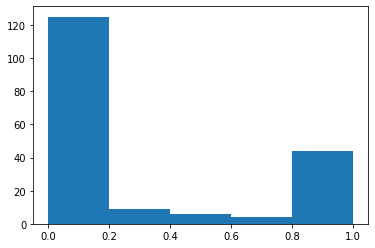

In [160]:
import matplotlib.pyplot as plt

wrong = plt.hist(histoGW,5)

In [162]:
histoGW

[0.9034060591441815,
 0.3631850787043096,
 0.4457904278841782,
 0.004588507169991929,
 0.004663923837409323,
 0.01001477383701399,
 0.952287646434745,
 0.959159856608177,
 0.08000014737961336,
 0.06547317522986673,
 0.5255877792775399,
 0.009402194969970301,
 0.7769260033939904,
 0.9614565218830907,
 0.016449030227533745,
 0.020801630158293616,
 0.00283386207874603,
 0.00034991262309724824,
 0.03181500443273988,
 0.034512153785443256,
 0.9258588604234,
 0.0003819974143877136,
 0.01849598494383531,
 0.005114126731140534,
 0.023185999745727992,
 0.9964133820714914,
 0.9347800857919979,
 0.338763958163232,
 0.00136213720922429,
 0.3461693481835445,
 0.000637897126855691,
 0.953238047226208,
 0.6524116621048783,
 0.014462173658973287,
 0.012345524436919053,
 0.5429473823972473,
 0.007872234288380575,
 0.8682375745028827,
 0.005305471353221014,
 0.0005735135481728104,
 0.16438547095192158,
 0.005367131312355999,
 0.0063995503708922374,
 0.9001418806608246,
 0.9867335630342104,
 0.0224049280

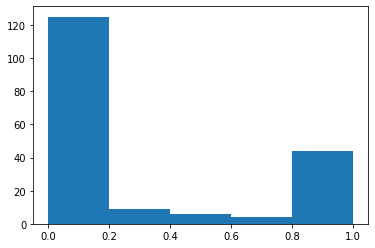

In [163]:
correct = plt.hist(histoGW,5)

In [164]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoGC+histoGW))
print("correct")
print(statistics.mean(histoGC))
print("wrong")
print(statistics.mean(histoGW))

all
0.27130137999124393
correct
0.2666920324825147
wrong
0.276499154841513


In [ ]:
doc3
doc4


In [ ]:
doc1.similarity(doc2)

In [34]:
len(doc3)

TypeError: object of type 'generator' has no len()

In [119]:
doc3 = nlp.pipe(jobs_skills)
doc4 = nlp.pipe(courses_skills)

In [176]:
len(job_sumsG)

876

(array([6526.,  198.,  105.,   89.,   54.,   34.,   35.,   36.,   38.,
          29.]),
 array([2.51109464e+01, 1.00055903e+04, 1.99860696e+04, 2.99665489e+04,
        3.99470282e+04, 4.99275075e+04, 5.99079868e+04, 6.98884661e+04,
        7.98689454e+04, 8.98494247e+04, 9.98299040e+04]),
 <a list of 10 Patch objects>)

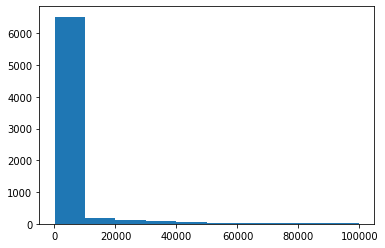

In [229]:
plt.hist(maxH)


In [230]:
print(statistics.mean(maxH))
print(statistics.median(maxH))

4424.273784872119
725.0740458068365


In [228]:
#1-norm 
#new
count = 0
maxH = []
for word in course_sumsG:
    norm = 0
    for skill in word:
        norm = norm + abs(skill)
    if norm < 99999:
        maxH.append(norm)
        count = count + 1
print(count)
print(max(maxH))
print(min(maxH))
print(max(maxH)-min(maxH))

7144
99829.90403944821
25.110946397474482
99804.79309305074


In [64]:
#1-norm 
maxH = []
for word in job_sumsG:
    norm = 0
    for skill in word:
        norm = norm + abs(skill)
    maxH.append(norm)
print(max(maxH))
print(min(maxH))

4.911290710705309e+97
26.84024786455842


In [50]:
%%time
column = []
for docj in doc3:
    row = []
    doc4 = nlp.pipe(courses_skills[1:])
    for docc in doc4:
        row.append(docc.similarity(docj))
        
    column.append(row)
    

/Users/ryancramer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  


KeyboardInterrupt: 

In [85]:
#column

In [52]:
len(column)

106

In [60]:
column[32][12]

0.8009340979801013

In [61]:
column[30][30]

0.9015918614073354

In [63]:
column[100][50]

0.8182976717927929

In [65]:
column[10][393]

0.7971872189097666

In [71]:
column[17][6811]

0.9102584067254846

In [94]:
column[17][6211]

0.31552061743451926

In [109]:
df_simFCG[1432][11]

0.6569993161115815

In [122]:
df_simFCG[720][65]

0.9399438552122324

In [158]:
df_simFCG[6221][15]

-0.05968925133647218

In [160]:
column[15][6221]

0.8101605146640989

In [166]:
df_simFCG[7620][64]

0.9667885794924351

In [111]:
df_simFCG[7620][61]

0.9662907929878722

In [74]:
df_simFCG[6811][17]

0.9509663299809495

In [76]:
his = []
his.append(df_simFCG[6811][17])
his.append(column[17][6811])

In [77]:
bin_size = 10
his.hist(bins=bin_size)

AttributeError: 'list' object has no attribute 'hist'

In [167]:
data = {"Similarity":[column[61][7620],column[101][1502],column[100][1500],column[100][150],column[64][7620],column[10][393],column[100][50],column[17][6211],column[11][1432],column[15][6221]],
       "Simple Avg":[df_simFCG[7620][61],df_simFCG[1502][101],df_simFCG[1500][100],df_simFCG[150][100],df_simFCG[7620][64],df_simFCG[393][10],df_simFCG[50][100],df_simFCG[6211][17],df_simFCG[1432][11],df_simFCG[6221][15]]}
dftest = pd.DataFrame(data)
dftest.head()

,Similarity,Simple Avg
0,0.868249,0.966291
1,0.302115,0.947453
2,0.883923,0.910163
3,0.840756,0.962647
4,0.880724,0.966789


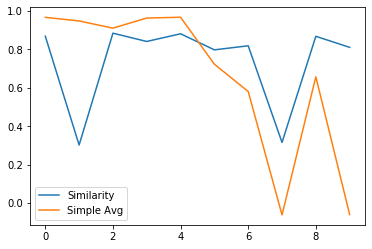

In [168]:

dftest.plot()

In [162]:
data = {"Similarity":[column[61][7620],column[101][1502],column[100][1500],column[100][150],column[17][6811],column[10][393],column[100][50],column[17][6211],column[11][1432],column[15][6221]],
       "Simple Avg":[df_simFCG[7620][61],df_simFCG[1502][101],df_simFCG[1500][100],df_simFCG[150][100],df_simFCG[6811][17],df_simFCG[393][10],df_simFCG[50][100],df_simFCG[6211][17],df_simFCG[1432][11],df_simFCG[6221][15]],
       "Word2Vec":[0.9671703723806584, 0.9597601097351024, 0.9551919832586061, 0.9468671072946526, 0.9455152948551715, 0.5005749779539954, 0.9480695043441145, 0.9109537803445638, 0.4086659835161115,0.9195301360386668]}
dfall = pd.DataFrame(data)
dfall.head()

,Similarity,Simple Avg,Word2Vec
0,0.868249,0.966291,0.967170
1,0.302115,0.947453,0.959760
2,0.883923,0.910163,0.955192
3,0.840756,0.962647,0.946867
4,0.910258,0.950966,0.945515


In [214]:
co 

0.9094763767507913

In [215]:
df_simFCG[122][7]

0.967070434160537

In [186]:
df_simFCG[11][5]

0.03233707193490942

In [220]:
data2 = {"Similarity":[0.8887664536419442,0.20692648918089684,0.186545001850615,0.905021474563197,0.889399613010405,0.8569016722417475,0.9094763767507913],
       "Simple Avg":[0.9624371140861648,0.9402090327477748,0.9667657173721272,0.9627032610544316,0.9667657173721272,0.03233707193490942,0.967070434160537],
       "Word2Vec":[0.9629466262171863,0.8960740944847622,0.9643601816109518,0.948777360767163,0.9426189626332377,0.9210900725597952,0.9590576955348454]}
dfalls = pd.DataFrame(data2)
dfalls.head()

,Similarity,Simple Avg,Word2Vec
0,0.888766,0.962437,0.962947
1,0.206926,0.940209,0.896074
2,0.186545,0.966766,0.964360
3,0.905021,0.962703,0.948777
4,0.889400,0.966766,0.942619


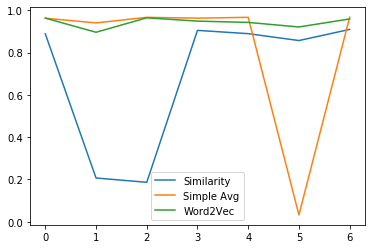

In [221]:
dfalls.plot()

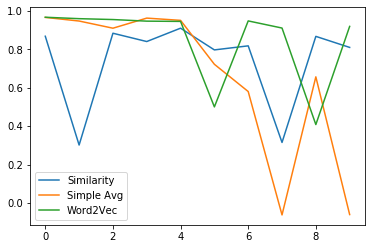

In [163]:
dfall.plot()

In [193]:
sim_flatG = simFEG.flatten()

In [194]:
df_FEW = pd.DataFrame(sim_flatG)

In [205]:
count = 0
for word in df_FEW:

    if word == 'inf':
        df_FEW[count] = 0
    count = count +1


In [208]:
len(jobs_text)

876

In [206]:
df_FEW

,0
0,inf
1,inf
2,inf
3,inf
4,inf
...,...
7683370,814.353437
7683371,171.138667
7683372,154.826423
7683373,153.799418


ValueError: supplied range of [1.090975464354136, inf] is not finite

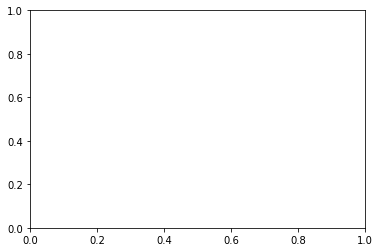

In [209]:
df_FEW[876:].hist()

In [145]:
from numpy import array

In [146]:
sim_flat2 = array(column)

In [147]:
sim_flat2 = sim_flat2.flatten()

In [151]:
df_col = pd.DataFrame(sim_flat2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ae30871d0>]],
      dtype=object)

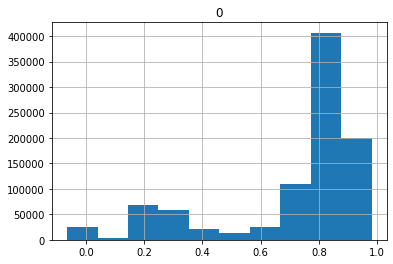

In [154]:
df_col.hist()

In [138]:
df_col

,0,1,2,3,4,5,6,7,8,9,...,8770,8771,8772,8773,8774,8775,8776,8777,8778,8779
0,0.866765,0.820076,0.831417,0.735399,0.746892,0.826259,0.824602,0.863643,0.881462,0.827351,...,0.815167,0.851790,0.761471,0.180216,0.820568,0.348516,0.808758,0.178895,0.880250,0.802418
1,0.891944,0.840918,0.833264,0.726092,0.809313,0.803603,0.846248,0.878570,0.881742,0.860609,...,0.786309,0.904033,0.843263,0.216125,0.842062,0.331369,0.804828,0.214330,0.908770,0.855686
2,0.866756,0.843843,0.871807,0.780722,0.818170,0.883924,0.864499,0.868410,0.915478,0.815102,...,0.867475,0.856220,0.757057,0.225937,0.823581,0.312833,0.880187,0.231751,0.861052,0.758024
3,0.800267,0.844040,0.849693,0.739201,0.749170,0.872241,0.818690,0.818136,0.827945,0.781618,...,0.824751,0.857020,0.800465,0.193315,0.783639,0.306849,0.832592,0.193253,0.844189,0.784805
4,0.905055,0.849839,0.824750,0.726188,0.806523,0.821110,0.855340,0.893772,0.896083,0.852852,...,0.811606,0.902216,0.828375,0.199692,0.854019,0.320477,0.818777,0.197118,0.908849,0.844831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.871712,0.874421,0.829645,0.726661,0.844094,0.847679,0.882884,0.874937,0.934145,0.842537,...,0.831872,0.912182,0.842248,0.192235,0.829687,0.302115,0.838102,0.194106,0.872383,0.820866
102,0.869851,0.869192,0.807313,0.707316,0.842197,0.831375,0.892902,0.834168,0.923708,0.825284,...,0.809118,0.883473,0.818260,0.190140,0.798701,0.343723,0.820845,0.192364,0.846938,0.788358
103,0.877193,0.809765,0.841510,0.740637,0.763970,0.827107,0.811235,0.895026,0.862903,0.865603,...,0.804289,0.861979,0.787114,0.221570,0.846148,0.244127,0.826632,0.225078,0.894319,0.819116
104,0.852144,0.870217,0.885142,0.757123,0.799114,0.895028,0.871197,0.869855,0.873740,0.818456,...,0.849978,0.874158,0.811769,0.198814,0.828402,0.316636,0.864147,0.198861,0.872508,0.799443


In [ ]:
df_col.flatten()

In [136]:
df_col.hist()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a9562a4d0> (for post_execute):


KeyboardInterrupt: 

In [155]:
sim_flat = simFCG.flatten()

In [156]:
df_FCG = pd.DataFrame(sim_flat)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ae4b6b090>]],
      dtype=object)

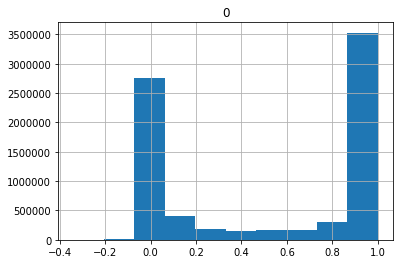

In [157]:
df_FCG.hist()

In [121]:
#job_sumsG[296]

In [124]:
course_sumsG[1]

array([ 6.22253498e-02,  8.47590910e-02, -1.81368732e-01,  8.77661384e-02,
        2.31997596e-01,  1.07231024e-01,  8.54509459e-02, -1.42895576e-01,
        7.79557043e-02,  3.82282761e+00, -5.41577120e-01,  1.40620835e-01,
        1.19781283e-01,  1.70211248e-01,  1.64347102e-01, -2.41038781e-03,
       -3.16873474e-01,  4.33978062e+00, -4.63237095e-01, -1.17214055e-01,
       -1.54751449e-01,  6.60358664e-02, -9.06396371e-02, -3.96652854e-02,
        4.49409770e-01,  2.16198879e-01,  4.69763404e-01,  1.11959386e-01,
        2.28728940e-02, -1.39637336e-01,  7.55165274e-02, -1.31798115e-01,
        2.81120970e-01,  1.63538366e-01, -1.26998061e-02, -5.68814446e-01,
        2.54753397e-02,  6.20866939e-02, -2.18348424e-01, -3.22177564e-01,
       -8.01922121e-02,  2.70841568e-02, -1.24656478e-01, -1.16285949e-01,
       -3.11819019e-01,  1.68754796e-01, -3.88569348e-03,  2.29859419e-01,
        4.06840750e-02,  3.58681872e-02, -2.45724988e-01, -1.20277455e-01,
        1.87541038e-01, -

In [109]:
jobs_skills[296]

'employer career technology people entry level inside account career award training design cost effective account craft build consultative long term long term business government education healthcare nationwide money dedicated look outbound potential key decision customer close value business strategic advantage long term long term drive aspiration microsoft office microsoft office basic computer organization time management time management help dual monitor communication aid base salary plus commission partner account prior move dental vision stock purchase stock purchase education tuition give back community match multi brand technology provider business government education healthcare united states united united kingdom united kingdom company approximately year march company net information www list america top military g work list military list top culture top chicago performer chicago network census high number executive thomas list thomas one u equal opportunity employer employme

In [98]:
jobs_skills[459]

'employer canon canon financial mount legal specialist manage legal portfolio collection portfolio avoid legal action works outside settlement authority loss contact net investment exercise independent judgment cost benefit cost benefit litigation activity customer financial status time default determine credit degree risk customer contract placement assignment process cost structure cost structure assignment flat contingency create customer canon asset order loss third legal collection legal secure interest lease equipment recovery approve payment customer third outside develop monitor third effectiveness recovery loss business process legal legal proper internal external improve process efficiency make management make process make process improvement process improvement billing process limited review billing cash application work witness settlement special bachelor degree area equivalent work experience minimum commercial experience minimum commercial leasing experience understanding

In [108]:
courses_skills[1]

'deal web accessibility web accessibility community college system free professional development professional development opportunity help educational meet accessibility web content importance accessibility essential communication tool equal barrier free access information educational information focus accessibility legal educational information educational accessibility communication accessibility important educational effect accessibility people access information international standard international standard web accessibility web accessibility pdf audio video audio video html access web essential requirement full participation information society'

In [107]:
df_skill[1]

'.net 4'

In [ ]:
df_skill

In [127]:
df_simFEG[0][2]

8.442999917453758

In [95]:
df_simFEG[230][459]

4.365590689212796e+96

In [170]:
#Word 2 Vec Euclidean distance
average = 0
count = 0
histoGW = []
histoGC = []
for word in test_df3.values:
    one = df_simFEG[word[1]][word[0]]
    two = df_simFEG[word[2]][word[0]]
    
    #if word[3] == 1 or word[3] == 2:
        #count = count+1
    #if one == two:
        #count = count-1
        #print(word[1])
        #print(one)
        #print(word[2])
        #print(two)
        #print("new")
    if (one+two) < 9999999:
        if word[3] == 1 and one < two:
            #print(one)
            #print(two)
            #print("")
            average = average + 1 
            histoGC.append(abs(abs(one)-abs(two)))
            count = count+1
        elif word[3] == 2 and two < one:
            average = average + 1
            histoGC.append(abs(abs(one)-abs(two))) 
            count = count+1
        elif word[3] == 1 or word[3] == 2:
            histoGW.append(abs(abs(one)-abs(two)))
            count = count+1
        
average = average/count
print(average)
print("Count")
print(count)

0.5282051282051282
Count
195


In [169]:
histoGW

[419.6831255427139,
 40.53314990882356,
 4.522468239355021,
 14.207958993078705,
 265.70707929805235,
 12.562331379671747,
 2917.372886571776,
 179.55033062531595,
 1347020.6533729802,
 71.45486148974004,
 42.166450365559626,
 4589457.928404281,
 263.1097364033789,
 35338.39417270174,
 147.53921020892938,
 0.649670936478401,
 10.525470935917383,
 93.74431398960394,
 38.303445045899934,
 3749.7179213537956,
 101.32297267296713,
 21.471817379140333,
 195.63293499200608,
 75443.62232757437,
 85.26465142422899,
 6.74008407454221,
 120.83312389653378,
 128.72414056382294,
 24.84651221295698,
 189.22831175123844,
 2.631439368345582,
 4.77015733676954,
 132.9525469138227,
 28.37581490768332,
 173.72367470723952,
 23.004178518973646,
 41.03498211424176,
 479.0506285182201,
 69.93919458190635,
 100.60669771144575,
 446851.76940034644,
 692264.449153277,
 25620.098476209518,
 90.12571653403938,
 16572093.70897758,
 37.128620283899025,
 1328.3863269337025,
 12.407192814913685,
 88.19349301204932,

In [171]:
import statistics
#average difference in similarity
print("all")
print(statistics.mean(histoGC+histoGW))
print("correct")
print(statistics.mean(histoGC))
print("wrong")
print(statistics.mean(histoGW))

all
160117.97222675444
correct
119310.26496770936
wrong
205804.86187546793


In [215]:
with open("/Users/ryancramer/Desktop/handshake1.txt") as f:
    for line in f:
        data.append(json.loads(line))
df14 = pd.DataFrame(data)


In [216]:
text224 = df14['description']

In [221]:
text224

0       In this third course of the specialization, we...
1       Many educators are under-prepared to deal with...
2       Registration is open from November 3, 2014 unt...
3       Since the invention of the telescope in 1608, ...
4       Chinese archaeology is one of the fastest-grow...
                              ...                        
8794    Employer: Raytheon Company \n\n Expires: 03/22...
8795    Employer: Optymyze \n\n Expires: 06/05/2018 \n...
8796    Employer: Religio \n\n Expires: 04/01/2018 \n\...
8797    Employer: Stang Decision Systems \n\n Expires:...
8798    Employer: QSC \n\n Expires: 04/07/2018 \n\n De...
Name: description, Length: 8799, dtype: object

In [219]:
text224.to_excel("Tableautest.xlsx")


In [ ]:
job 6 not similar